In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Dell/PycharmProjects/AQIndex/Data/Real-Data/real_comb.csv")

In [4]:
df.head()

,T,TM,Tm,H,W,V,VM,PM2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [11]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
W        0
V        0
VM       0
PM2.5    1
dtype: int64

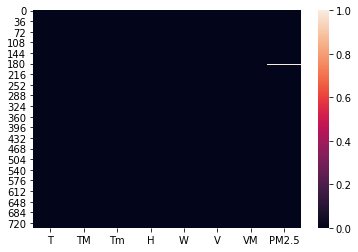

In [12]:
sns.heatmap(df.isna())

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
W        0
V        0
VM       0
PM2.5    0
dtype: int64

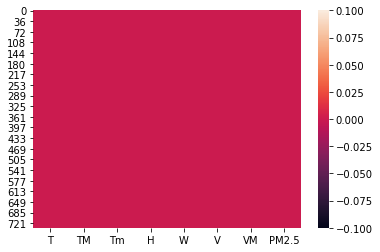

In [15]:
sns.heatmap(df.isna())

In [19]:
x= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=2)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
Kreg= KNeighborsRegressor()

In [24]:
Kreg.fit(x_train,y_train)

KNeighborsRegressor()

In [25]:
Kreg.score(x_train,y_train)

0.6071847939748993

In [26]:
Kreg.score(x_test,y_test)

0.396363642794508

#### Second way to check is through  crossvalidation

In [27]:
from sklearn.model_selection import cross_val_score

In [29]:
score= cross_val_score(Kreg,x,y)

In [30]:
score.mean()

0.23307018441281424

In [32]:
prediction= Kreg.predict(x_test)

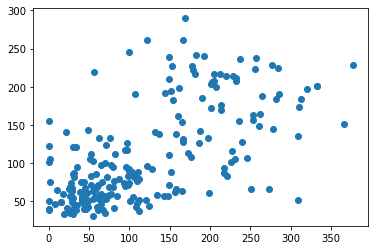

In [33]:
plt.scatter(y_test, prediction)

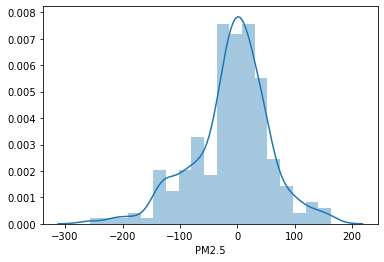

In [34]:
sns.distplot(prediction- y_test)

##### We see the accuracyR squared score is further decreased 

#### Third way to go with Hyperparameter Tuning- GridsearchCV or Randomised searchCV

##### Before trials of neighbors in Cross validation

##### from sklearn.model_selection import GridSearchCV

In [53]:
Score=[]
for i in range(1,100):
    
    Kreg2= KNeighborsRegressor(n_neighbors=i)
    
    acc_score= cross_val_score(Kreg2, x,y, cv=10)
    Score.append(acc_score.mean())
    

Text(0, 0.5, 'Accurac Score')

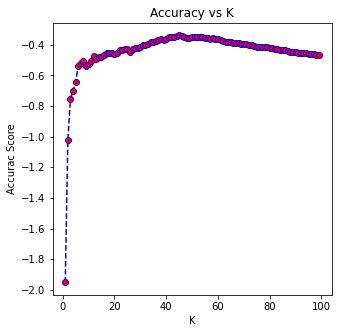

In [55]:
plt.figure(figsize=(5,5))

plt.plot(range(1,100), Score, color='blue', linestyle='dashed', marker='o', markerfacecolor='red')
plt.title("Accuracy vs K")
plt.xlabel('K')
plt.ylabel('Accurac Score')

## From grapgh we see initially as value of K is increasig the accuracy is increasing after k=43 around, accuracy starts decreasing
## So from graph we can say k we can take at 43

In [93]:
kreg2= KNeighborsRegressor(n_neighbors=20)

In [94]:
kreg2.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [95]:
kreg2.score(x_train,y_train)

0.5083951317447801

In [96]:
kreg2.score(x_test,y_test)

0.4107674861578947

In [104]:
Kreg3= KNeighborsRegressor()

In [ ]:
n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
    **kwargs,
)

In [103]:
params= {'n_neighbors': [10,20,25,30,35,40,45,50,55,60,70,80,90], 'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[10,20,30,40,50], 
            'p': [2,4,6,8,10,12,14]}

In [106]:
gcv= GridSearchCV(Kreg3, param_grid=params, n_jobs=-1, scoring='neg_mean_squared_error', cv=5  )

In [107]:
gcv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [10, 20, 25, 30, 35, 40, 45, 50, 55, 60,
                                         70, 80, 90],
                         'p': [2, 4, 6, 8, 10, 12, 14],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [108]:
gcv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'distance'}

In [110]:
kreg3= KNeighborsRegressor(algorithm='auto',
 leaf_size= 10,
 n_neighbors = 30,
 p=  2,
 weights= 'distance')

In [111]:
kreg3.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=30, weights='distance')

In [112]:
kreg3.score(x_train,y_train)

1.0

In [113]:
kreg3.score(x_test,y_test)

0.4268318897880109

In [132]:
prediction=kreg3.predict(x_test)

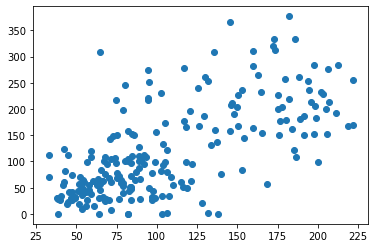

In [133]:
plt.scatter(prediction,y_test)

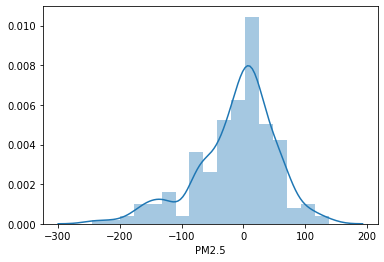

In [136]:
sns.distplot(prediction-y_test)

#### GridSearchCV in KNregressor- giving best predition as of now

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
Kreg4= KNeighborsRegressor()

In [120]:
rcv= RandomizedSearchCV(Kreg4,param_distributions=params, n_iter=20, n_jobs=-1, scoring='neg_mean_squared_error' )

In [121]:
rcv.fit(x,y)

RandomizedSearchCV(estimator=KNeighborsRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 40, 50],
                                        'n_neighbors': [10, 20, 25, 30, 35, 40,
                                                        45, 50, 55, 60, 70, 80,
                                                        90],
                                        'p': [2, 4, 6, 8, 10, 12, 14],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_squared_error')

In [122]:
rcv.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 45,
 'leaf_size': 30,
 'algorithm': 'ball_tree'}

In [123]:
rcv.best_score_

-4444.744459432181

In [127]:
Kreg4= KNeighborsRegressor(weights= 'distance',
 p= 2,
 n_neighbors= 45,
 leaf_size=30,
 algorithm ='ball_tree')

In [128]:
Kreg4.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=45, weights='distance')

In [129]:
Kreg4.score(x_train,y_train)

1.0

In [130]:
Kreg4.score(x_test,y_test)

0.4078565009073619

##### score  of GridsearchCV is better than andomizedSearchCV

In [131]:
from sklearn import metrics

In [138]:
metrics.mean_squared_error(y_test,prediction)

4355.652386237256

In [139]:
metrics.mean_absolute_error(y_test,prediction)

47.883271907329316

In [140]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

65.99736650986353

#### Saving the model

In [141]:
import pickle

In [144]:
file= open('kNeighbore.pkl','wb')

In [145]:
pickle.dump(kreg3,file)